In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Combine the training and testing images
mnist_images = np.concatenate((train_images, test_images), axis=0)

# Combine the training and testing labels
mnist_labels = np.concatenate((train_labels, test_labels), axis=0)

# Print the shapes of the combined data
print("MNIST images shape:", mnist_images.shape)
print("MNIST labels shape:", mnist_labels.shape)

MNIST images shape: (70000, 28, 28)
MNIST labels shape: (70000,)


In [ ]:
# rotating MNIST Dataset


from PIL import Image

# Rotate function
def rotate_image(image, angle):
    image_pil = Image.fromarray(image.astype('uint8'), 'L')
    rotated_image = image_pil.rotate(angle)
    rotated_image = np.array(rotated_image)
    return rotated_image


# Rotate each image in the dataset
rotated_mnist_images = []
rotated_mnist_labels = []
rotation_angles = []

for i in range(len(mnist_images)):
    angle = np.random.randint(-90, 91)
    rotated_image = rotate_image(mnist_images[i], angle)
    rotated_mnist_images.append(rotated_image)
    rotated_mnist_labels.append(mnist_labels[i])
    rotation_angles.append(angle)

rotated_mnist_images = np.array(rotated_mnist_images)
rotated_mnist_labels = np.array(rotated_mnist_labels)
rotation_angles = np.array(rotation_angles)

# Print the shape of the rotated dataset
print("Rotated MNIST images shape:", rotated_mnist_images.shape)
print("Rotated MNIST labels shape:", rotated_mnist_labels.shape)
print("Rotation angles shape:", rotation_angles.shape)

Rotated MNIST images shape: (70000, 28, 28)
Rotated MNIST labels shape: (70000,)
Rotation angles shape: (70000,)


Angle: 3
Size: (28, 28)
Original size: (28, 28)
label 5


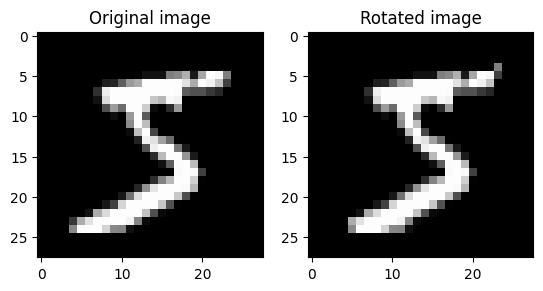

Angle: -42
Size: (28, 28)
Original size: (28, 28)
label 0


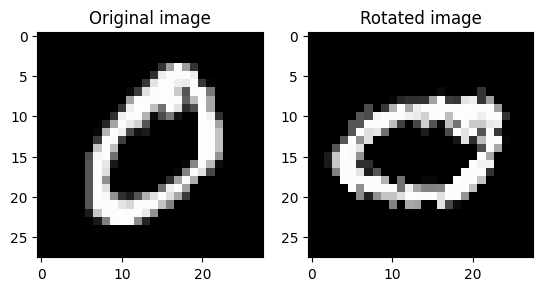

Angle: 47
Size: (28, 28)
Original size: (28, 28)
label 4


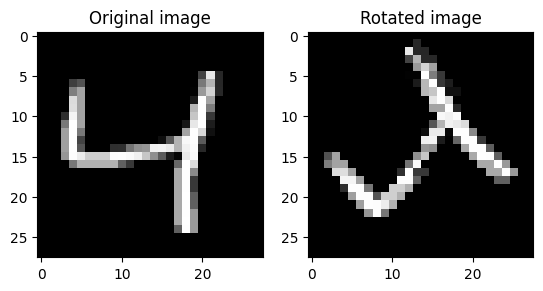

Angle: -2
Size: (28, 28)
Original size: (28, 28)
label 1


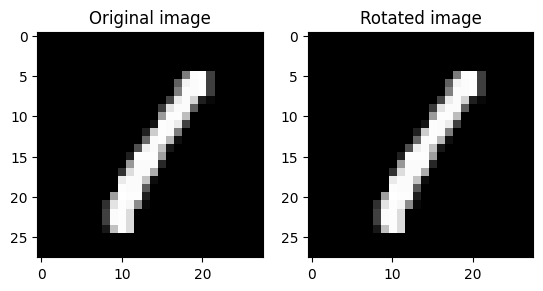

Angle: -54
Size: (28, 28)
Original size: (28, 28)
label 9


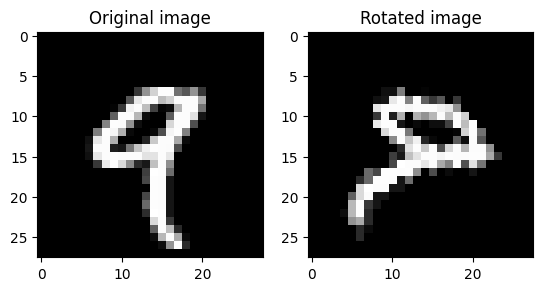

In [ ]:
# printing the rotated MNIST

import matplotlib.pyplot as plt

# Print some images
for i in range(5):
    print("Angle:", rotation_angles[i])
    image = rotated_mnist_images[i]
    print("Size:", image.shape)

    # Print the original image
    orig_image = mnist_images[i]
    print("Original size:", orig_image.shape)
    print("label", mnist_labels[i])

    # Display the original image and the rotated image
    plt.subplot(1, 2, 1)
    plt.imshow(orig_image, cmap="gray")
    plt.title("Original image")
    plt.subplot(1, 2, 2)
    plt.imshow(image, cmap="gray")
    plt.title("Rotated image")
    plt.show()

In [ ]:
# dividing dataset in training, testing and validation set

rotated_train_images = rotated_mnist_images[:10000]
rotated_train_labels = rotated_mnist_labels[:10000]
rotation_train_angles = rotation_angles[:10000]

rotated_validation_images = rotated_mnist_images[10000:12000]
rotated_validation_labels = rotated_mnist_labels[10000:12000]
rotation_validation_angles = rotation_angles[10000:12000]

rotated_test_images = rotated_mnist_images[12000:]
rotated_test_labels = rotated_mnist_labels[12000:]
rotation_test_angles = rotation_angles[12000:]

# Print the shapes of the divided sets
print("Rotated Train Images shape:", rotated_train_images.shape)
print("Rotated Train Labels shape:", rotated_train_labels.shape)
print("Rotation Train Angles shape:", rotation_train_angles.shape)
print("Rotated Validation Images shape:", rotated_validation_images.shape)
print("Rotated Validation Labels shape:", rotated_validation_labels.shape)
print("Rotation Validation Angles shape:", rotation_validation_angles.shape)
print("Rotated Test Images shape:", rotated_test_images.shape)
print("Rotated Test Labels shape:", rotated_test_labels.shape)
print("Rotation Test Angles shape:", rotation_test_angles.shape)

Rotated Train Images shape: (10000, 28, 28)
Rotated Train Labels shape: (10000,)
Rotation Train Angles shape: (10000,)
Rotated Validation Images shape: (2000, 28, 28)
Rotated Validation Labels shape: (2000,)
Rotation Validation Angles shape: (2000,)
Rotated Test Images shape: (58000, 28, 28)
Rotated Test Labels shape: (58000,)
Rotation Test Angles shape: (58000,)


In [ ]:
# 2FC

#!pip install keras tensorflow

from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.optimizers import Adam
from keras.losses import mean_squared_error,MeanAbsoluteError


# Create the model
input_size=28*28
model = Sequential()

model.add(Flatten(input_shape=((28, 28))))
# Add the input layer with 20 neurons
model.add(Dense(20, activation='relu'))

# Add the output layer with 1 neuron
model.add(Dense(1, activation='sigmoid'))

# Print the summary of the model
model.summary()

# Compile the model
learning_rate = 0.001
momentum_1 = 0.9
momentum_2 = 0.999
optimizer = Adam(learning_rate=learning_rate, beta_1=momentum_1, beta_2=momentum_2)
loss = mean_squared_error

model.compile(loss=mean_squared_error, optimizer=optimizer)

# Train the model
epochs = 160
batch_size = 128

# Assuming you have x_train and y_train as the training data
Histroy=model.fit(rotated_train_images,rotation_train_angles, epochs=epochs, batch_size=batch_size)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 20)                15700     
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 15,721
Trainable params: 15,721
Non-trainable params: 0
_________________________________________________________________
Epoch 1/160
79/79 [==============================] - 1s 3ms/step - loss: 2727.9375
Epoch 2/160
79/79 [==============================] - 0s 3ms/step - loss: 2722.1140
Epoch 3/160
79/79 [==============================] - 0s 3ms/step - loss: 2716.2690
Epoch 4/160
79/79 [==============================] - 0s 3ms/step - 

Average Training Loss of 2fc in MNIST is  52.03646596064006


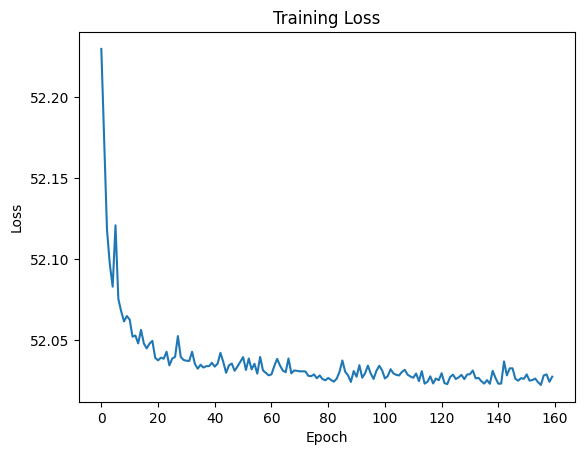

In [ ]:
# 2fc Loss Graph
loss=Histroy.history['loss']
Training_loss=sum(loss)/160
print("Average Training Loss of 2fc in MNIST is ",np.sqrt(Training_loss))
loss=np.sqrt(loss)
plt.plot(loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [ ]:
loss_mnist_2fc = model.evaluate(rotated_validation_images, rotation_validation_angles)
print("Loss in Validation MNIST Dataset is :", np.sqrt(loss_mnist_2fc))

63/63 [==============================] - 0s 2ms/step - loss: 2711.9404
Loss in Validation MNIST Dataset is : 52.07629431600812


In [ ]:
test_prediction=model.predict(rotated_test_images)

loss=mean_squared_error(rotation_test_angles ,test_prediction)
loss=sum(loss)/len(loss)

print("Loss on Testing MNIST Dataset is : ", np.sqrt(loss))

1563/1563 [==============================] - 3s 2ms/step
Loss on Testing MNIST Dataset is :  52.315033


In [ ]:
# CNN model with Max Pooling

# Create the model
model1 = Sequential()

# First Convolutional Layer
model1.add(Conv2D(16,(3,3), activation='relu', padding = 'same', input_shape=(28, 28,1)))

# First Pooling Layer
model1.add(MaxPooling2D(pool_size=(2,2),padding = 'same'))

# Second Convolutional Layer
model1.add(Conv2D(32, (3, 3), activation='relu',padding = 'same'))

# Second Pooling Layer
model1.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output
model1.add(Flatten())

# Fully Connected Network
model1.add(Dense(20, activation='relu'))

# Dropout Layer
model1.add(Dropout(0.5))

# Output Layer
model1.add(Dense(1, activation='sigmoid'))



learning_rate = 0.001
momentum_1 = 0.9
momentum_2 = 0.999
optimizer = Adam(learning_rate=learning_rate, beta_1=momentum_1, beta_2=momentum_2)


model1.compile(optimizer=optimizer,loss=mean_squared_error)

# Print the summary of the model
model1.summary()

# Train the model
epochs = 160
batch_size = 128
# Assuming you have x_train and y_train as the training data
history_loss_cnn=model1.fit(rotated_train_images,rotation_train_angles, epochs=epochs, batch_size=batch_size)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1568)              0         
                                                                 
 dense_4 (Dense)             (None, 20)               

Average Training Loss of CNN in MNIST is  52.07269771942222


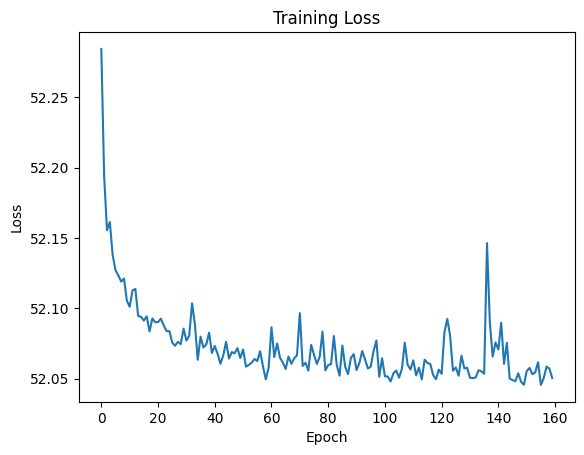

In [ ]:
loss_cnn=history_loss_cnn.history['loss']
Training_loss_cnn=sum(loss_cnn)/160
print("Average Training Loss of CNN in MNIST is ",np.sqrt(Training_loss_cnn))
loss_cnn=np.sqrt(loss_cnn)
plt.plot(loss_cnn)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [ ]:
loss_cnn_mnist = model1.evaluate(rotated_validation_images, rotation_validation_angles)
print("Loss oF CNN model on Validation MNIST Dataset is :", np.sqrt(loss_cnn_mnist))

63/63 [==============================] - 1s 9ms/step - loss: 2712.2563
Loss oF CNN model on Validation MNIST Dataset is : 52.079327450114505


In [ ]:
test_prediction_cnn=model1.predict(rotated_test_images)

loss_cnn=mean_squared_error(rotation_test_angles ,test_prediction_cnn)
loss_cnn=sum(loss_cnn)/len(loss_cnn)

print("Loss of CNN Model on Testing MNIST Dataset is : ", np.sqrt(loss_cnn))

1563/1563 [==============================] - 14s 9ms/step
Loss of CNN Model on Testing MNIST Dataset is :  52.314556


In [ ]:
# AveragePooling2D

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,AveragePooling2D
from keras.optimizers import Adam
from keras.losses import MeanSquaredError,MeanAbsoluteError
from keras.losses import mean_squared_error
# Create the model
model3 = Sequential()

# First Convolutional Layer
model3.add(Conv2D(16,(3,3), activation='relu', padding = 'same', input_shape=(28, 28,1)))

# First Pooling Layer
model3.add(AveragePooling2D(pool_size=(2,2),padding = 'same'))

# Second Convolutional Layer
model3.add(Conv2D(32, (3, 3), activation='relu',padding = 'same'))

# Second Pooling Layer
model3.add(AveragePooling2D(pool_size=(2, 2)))

# Flatten the output
model3.add(Flatten())

# Fully Connected Network
model3.add(Dense(20, activation='relu'))

# Dropout Layer
model3.add(Dropout(0.5))

# Output Layer
model3.add(Dense(1, activation='sigmoid'))



learning_rate = 0.001
momentum_1 = 0.9
momentum_2 = 0.999
optimizer = Adam(learning_rate=learning_rate, beta_1=momentum_1, beta_2=momentum_2)


model3.compile(optimizer=optimizer,loss=mean_squared_error)

# Print the summary of the model
model3.summary()

# Train the model
epochs = 160
batch_size = 128
# Assuming you have x_train and y_train as the training data
history_loss_cnn_AV=model3.fit(rotated_train_images,rotation_train_angles, epochs=epochs, batch_size=batch_size)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 16)       0         
 ooling2D)                                                       
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 average_pooling2d_1 (Averag  (None, 7, 7, 32)         0         
 ePooling2D)                                                     
                                                                 
 flatten_3 (Flatten)         (None, 1568)              0         
                                                                 
 dense_6 (Dense)             (None, 20)               

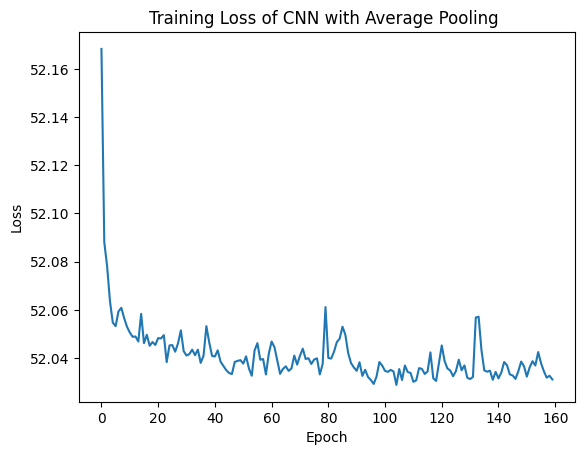

In [ ]:
loss_cnn_av=history_loss_cnn_AV.history['loss']
loss_cnn_av=np.sqrt(loss_cnn_av)
plt.plot(loss_cnn_av)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss of CNN with Average Pooling ')
plt.show()

In [ ]:
loss_cnn_mnist_av = model3.evaluate(rotated_validation_images, rotation_validation_angles)
print("Loss oF CNN model with Average Pooling on Validation MNIST Dataset is :", np.sqrt(loss_cnn_mnist_av))

63/63 [==============================] - 1s 8ms/step - loss: 2710.4646
Loss oF CNN model with Average Pooling on Validation MNIST Dataset is : 52.06212250388352


In [ ]:
test_prediction_cnn_av=model3.predict(rotated_test_images)

loss_testing_cnn_av=mean_squared_error(rotation_test_angles ,test_prediction_cnn_av)
loss_testing_cnn_av=sum(loss_testing_cnn_av)/len(loss_testing_cnn_av)

print("Loss of CNN Model with Average Pooling on Testing MNIST Dataset is : ", np.sqrt(loss_testing_cnn_av))

1563/1563 [==============================] - 14s 9ms/step
Loss of CNN Model with Average Pooling on Testing MNIST Dataset is :  52.314526


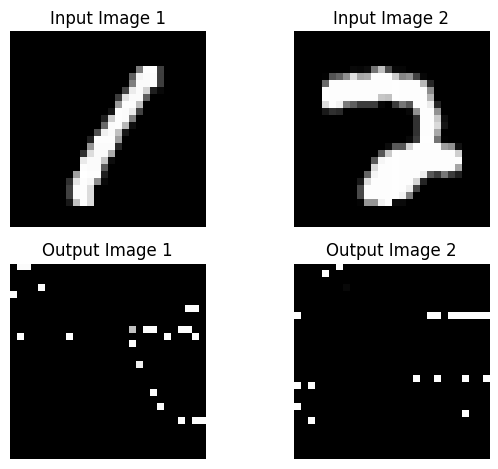

In [ ]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt

def polar_coordinate_convolution(image, kernel_size_radial, kernel_size_angular, stride_radial, stride_angular, padding_radial, padding_angular):
    height, width = image.shape[:2]
    img64_float = image.astype(np.float64)
    center = (width // 2, height // 2)
    max_radius = np.sqrt((width/2)**2 + (height/2)**2)

    # max_radius=min(center[0], width - center[0], center[1], height - center[1])
    polar_image = cv2.linearPolar(image, center, max_radius, cv2.WARP_FILL_OUTLIERS)
    # Apply convolution along radial and angular axes
    polar_height, polar_width = polar_image.shape[:2]
    padded_polar_height = polar_height + 2 * padding_radial
    padded_polar_width = polar_width + 2 * padding_angular

    # Determine the number of grids along the radial and angular axes
    num_radial_grids = 7  # 7 grids along radial axes
    num_angular_grids = int(360 / kernel_size_angular)  # 8 grids along angular axes
 # 8 grids along angular axes

    # Apply max operation inside each grid and store the switch
    # output = np.zeros((num_angular_grids,num_radial_grids), dtype=np.float32)
    output=[]
    switch = []

    for i in range(num_angular_grids):
        angular_start = int(i * stride_angular)
        angular_end = int(angular_start + stride_angular)
        temp=0
        # print("angular start ",angular_start )
        # print("angular_end ",angular_end)
        for j in range(num_radial_grids):
            radial_start = temp
            radial_end = radial_start + (stride_radial*(max_radius/num_radial_grids))
            x1=radial_start*math.cos(angular_start)
            y1=radial_start*math.sin(angular_start)
            x2=radial_end*math.cos(angular_end)
            y2=radial_end*math.sin(angular_end)
            temp=radial_end
            grid = polar_image[round(x1):round(x2),round(y1):round(y2)]
            if grid.size>0:
              max_val = np.max(grid)
              max_indices = np.unravel_index(np.argmax(grid), grid.shape)
              output.append(max_val)
              switch.append([round(x1) + max_indices[0], round(x2) + max_indices[1]])


    reconstructed_image = np.zeros_like(polar_image)
    for i in range(len(switch)):
      reconstructed_image[switch[i][0]][switch[i][1]]=output[i]

    # cartisian_image = cv2.linearPolar(reconstructed_image, (img64_float.shape[0]/2, img64_float.shape[1]/2),max_radius, cv2.WARP_INVERSE_MAP)

    return  reconstructed_image


# Set parameters for polar coordinate convolution
kernel_size_radial = np.pi / 4
kernel_size_angular = math.degrees(np.pi / 4)
stride_radial = 1
stride_angular = math.degrees(np.pi/4)
padding_radial = 0
padding_angular = 0

image1=cv2.cvtColor(train_images[3], cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(train_images[120], cv2.COLOR_BGR2RGB)
# Apply the polar coordinate convolution
output_image1 = polar_coordinate_convolution(image1, kernel_size_radial, kernel_size_angular,
                                            stride_radial, stride_angular, padding_radial, padding_angular)
output_image2 = polar_coordinate_convolution(image2, kernel_size_radial, kernel_size_angular,
                                            stride_radial, stride_angular, padding_radial, padding_angular)

# Resize output images for visualization
# resized_output1 = cv2.resize(output_image1, (100, 28))
# resized_output2 = cv2.resize(output_image2, (100, 28))

# output_image1 = (output_image1 * 255).astype(np.uint8)
# output_image2 = (output_image2 * 255).astype(np.uint8)
# # Display the input and output images
plt.subplot(2, 2, 1)
plt.imshow(image1, cmap='gray')
plt.title('Input Image 1')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(image2, cmap='gray')
plt.title('Input Image 2')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(output_image1, cmap='gray')
plt.title('Output Image 1')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(output_image2, cmap='gray')
plt.title('Output Image 2')
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# VGG-S for Caltech Dataset

# !pip install --upgrade protobuf
# !pip install protobuf==3.19.0
# !pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, GlobalMaxPooling2D, Flatten, concatenate, ZeroPadding2D

def create_model(input_shape):
    # Input layer
    inputs = tf.keras.Input(shape=input_shape)

    # Convolutional Layer 1
    conv1 = Conv2D(64, kernel_size=(3, 3), activation='relu')(inputs)
    norm1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(norm1)

    # Convolutional Layer 2
    conv2 = Conv2D(128, kernel_size=(3, 3), activation='relu')(pool1)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    # Convolutional Layer 3
    conv3 = Conv2D(256, kernel_size=(3, 3), activation='relu',padding='same')(pool2)

    # Convolutional Layer 4
    conv4 = Conv2D(256, kernel_size=(3, 3), activation='relu',padding="same")(conv3)

    # Convolutional Layer 5
    conv5 = Conv2D(256, kernel_size=(3, 3), activation='relu',padding='same')(conv4)

    # # Adjust spatial dimensions of conv3 and conv4
    # conv3_pad = ZeroPadding2D(padding=((0, 0), (0, 0)))(conv3)  # Pad conv3 to match conv5
    # conv4_pad = ZeroPadding2D(padding=((0, 0), (0, 0)))(conv4)  # Pad conv4 to match conv5

    # Concatenate conv3, conv4, and conv5
    concat = concatenate([conv3, conv4, conv5])

    # Global Pooling
    gp_pool = GlobalMaxPooling2D()(concat)

    # Flatten
    flatten = Flatten()(gp_pool)

    # Output layer (Theta)
    theta = tf.keras.layers.Dense(units=1, activation='linear')(flatten)

    # Create the model
    model = Model(inputs=inputs, outputs=theta)

    return model

# Define the input shape
input_shape = (480, 640, 3)  # 480x640 RGB images

# Create the model
model = create_model(input_shape)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 480, 640, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_35 (Conv2D)             (None, 478, 638, 64  1792        ['input_16[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 478, 638, 64  256        ['conv2d_35[0][0]']              
 alization)                     )                                                             

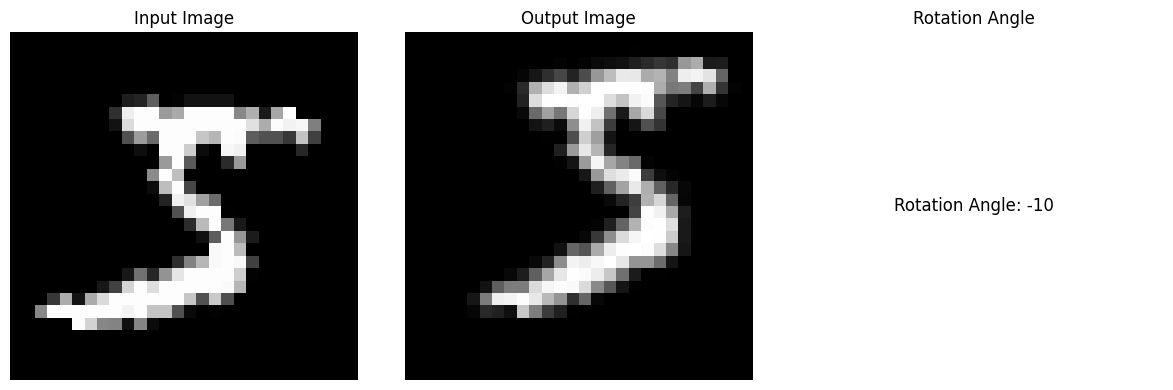

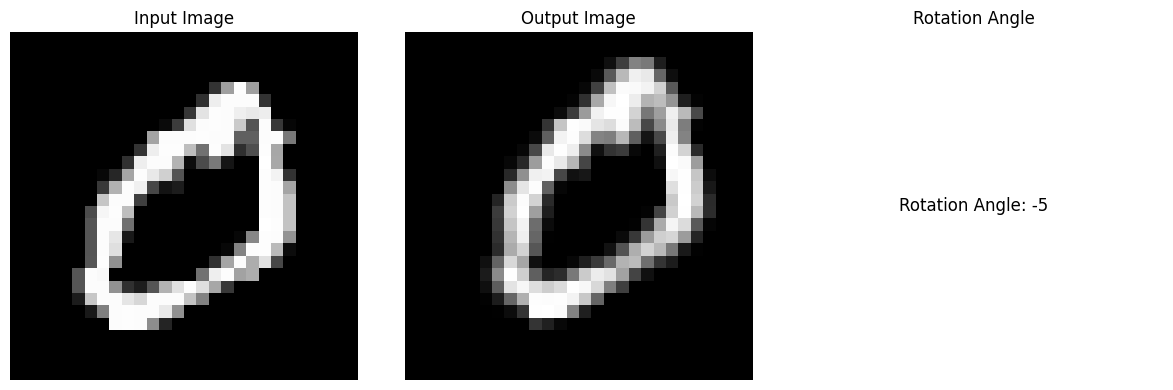

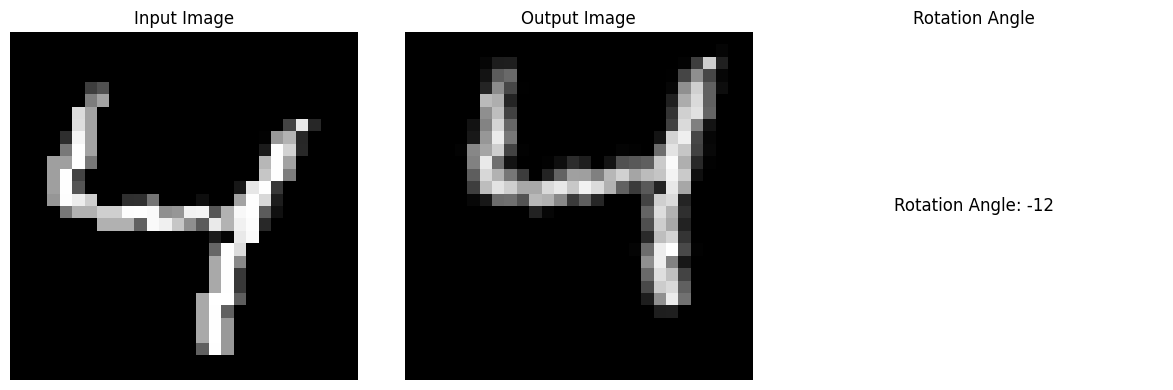

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import cv2
import numpy as np

# Construct the transformation matrix
def construct_transformation_matrix(theta):
    # Convert the rotation angle from degrees to radians
    theta_rad = np.radians(theta)

    # Build the 2x3 transformation matrix M
    cos_theta = np.cos(theta_rad)
    sin_theta = np.sin(theta_rad)
    matrix = np.array([[cos_theta, -sin_theta, 0],
                       [sin_theta, cos_theta, 0]])
    return matrix

# Implement the spatial transformer
def spatial_transformer(input_image, transformation_matrix):
    height, width = input_image.shape[:2]
    output_image = cv2.warpAffine(input_image, transformation_matrix, (width, height))

    return output_image

for i in [0,1,2]:
  # Generate a sample rotated image and angle
  rotated_image = rotated_train_images[i]
  rotation_angle = rotation_train_angles[i]

  # Construct the transformation matrix
  transformation_matrix = construct_transformation_matrix(rotation_angle)

  # Apply the spatial transformation
  output = spatial_transformer(rotated_image, transformation_matrix)

  # Display the input image, output image, and rotation angle
  fig, axs = plt.subplots(1, 3, figsize=(12, 4))

  # Plot the input image
  axs[0].imshow(rotated_image, cmap='gray')
  axs[0].set_title('Input Image')
  axs[0].axis('off')

  # Plot the output image
  axs[1].imshow(output, cmap='gray')
  axs[1].set_title('Output Image')
  axs[1].axis('off')

  # Display the rotation angle
  axs[2].text(0.5, 0.5, f'Rotation Angle: {rotation_angle}', fontsize=12, ha='center', va='center')
  axs[2].set_title('Rotation Angle')
  axs[2].axis('off')

  plt.tight_layout()
  plt.show()
